# Week 4 Assignment: Trying Out OSMnx Isochrone Mapping
For this assignment, I will be reloading the traffic collision data that my partner and I cleaned up and use it to try out the isochrone mapping from our last class.

## Part 1: Loading cleaned-up bike collision data
The CSV for [LAPD's traffic collision data from 2010 to present](https://data.lacity.org/Public-Safety/Traffic-Collision-Data-from-2010-to-Present/d5tf-ez2w) has been filtered to only include reported traffic collisions involving bikes. For each entry with a lat,long coordinates of "0,0", we have manually gone in to search up lat,long coordinates based on the "Address" (first street) and "Cross Street" (second intersecting street) provided. For entries that have neither lat,long coordinates nor "Address" and "Cross Street" . We created a [Google Doc documenting the process of cleaning up each affected entry](https://docs.google.com/document/d/1Iec81ZXlTOaoUa1vZBHPScEr9pMDE6vaom-cJ_Azbgw/edit?usp=sharing).

I used [a website that converts CSV files to GEOJSON](https://www.convertcsv.com/csv-to-geojson.htm). I will first load both files and pull sample entries from the data to test that they have been loaded properly.

In [2]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [3]:
csv = gpd.read_file('3 Bike Traffic Accident Data (Re-Cleaned) copy BL.csv')

In [4]:
csv.head

<bound method NDFrame.head of       DR Number Date Reported Date Occurred Time Occurred Area ID   Area Name  \
0     190617851       8/24/19       8/24/19          1115       6   Hollywood   
1     190715500       8/22/19       8/21/19          2230       7    Wilshire   
2     190715796       8/27/19       8/27/19          1420       7    Wilshire   
3     190814721       8/22/19       8/22/19          1730       8     West LA   
4     190814726       8/20/19       8/20/19           825       8     West LA   
...         ...           ...           ...           ...     ...         ...   
8739  160405135       1/27/16       1/27/16          2130       4  Hollenbeck   
8740  191321233      10/25/19      10/25/19          1500      13      Newton   
8741  191321291      10/22/19      10/22/19          1520      13      Newton   
8742  191321395      10/28/19      10/28/19          1945      13      Newton   
8743  191321398      10/28/19      10/28/19          1600      13      Newton  

In [7]:
csv.sample

<bound method NDFrame.sample of       DR Number Date Reported Date Occurred Time Occurred Area ID   Area Name  \
0     190617851       8/24/19       8/24/19          1115       6   Hollywood   
1     190715500       8/22/19       8/21/19          2230       7    Wilshire   
2     190715796       8/27/19       8/27/19          1420       7    Wilshire   
3     190814721       8/22/19       8/22/19          1730       8     West LA   
4     190814726       8/20/19       8/20/19           825       8     West LA   
...         ...           ...           ...           ...     ...         ...   
8739  160405135       1/27/16       1/27/16          2130       4  Hollenbeck   
8740  191321233      10/25/19      10/25/19          1500      13      Newton   
8741  191321291      10/22/19      10/22/19          1520      13      Newton   
8742  191321395      10/28/19      10/28/19          1945      13      Newton   
8743  191321398      10/28/19      10/28/19          1600      13      Newton

In [6]:
geo = gpd.read_file('3 Bike Traffic Accident Data (Re-Cleaned) copy BL.geojson')

In [9]:
geo.head

<bound method NDFrame.head of       DR Number Date Reported Date Occurred  Time Occurred  Area ID  \
0     190617851       8/24/19       8/24/19           1115        6   
1     190715500       8/22/19       8/21/19           2230        7   
2     190715796       8/27/19       8/27/19           1420        7   
3     190814721       8/22/19       8/22/19           1730        8   
4     190814726       8/20/19       8/20/19            825        8   
...         ...           ...           ...            ...      ...   
8739  160405135       1/27/16       1/27/16           2130        4   
8740  191321233      10/25/19      10/25/19           1500       13   
8741  191321291      10/22/19      10/22/19           1520       13   
8742  191321395      10/28/19      10/28/19           1945       13   
8743  191321398      10/28/19      10/28/19           1600       13   

       Area Name  Reporting District  Crime Code Crime Code Description  \
0      Hollywood                 615      

In [10]:
geo.sample

<bound method NDFrame.sample of       DR Number Date Reported Date Occurred  Time Occurred  Area ID  \
0     190617851       8/24/19       8/24/19           1115        6   
1     190715500       8/22/19       8/21/19           2230        7   
2     190715796       8/27/19       8/27/19           1420        7   
3     190814721       8/22/19       8/22/19           1730        8   
4     190814726       8/20/19       8/20/19            825        8   
...         ...           ...           ...            ...      ...   
8739  160405135       1/27/16       1/27/16           2130        4   
8740  191321233      10/25/19      10/25/19           1500       13   
8741  191321291      10/22/19      10/22/19           1520       13   
8742  191321395      10/28/19      10/28/19           1945       13   
8743  191321398      10/28/19      10/28/19           1600       13   

       Area Name  Reporting District  Crime Code Crime Code Description  \
0      Hollywood                 615    

The data looks good! Let's now plot the GEOJSON file.

<AxesSubplot:>

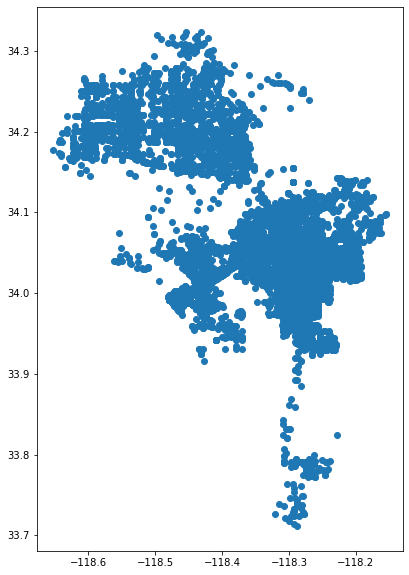

In [8]:
geo.plot(figsize=(10,10))

We want to differentiate the different MO (Modus Operandi) codes that LAPD uses to classify different types of traffic collisions.

<AxesSubplot:>

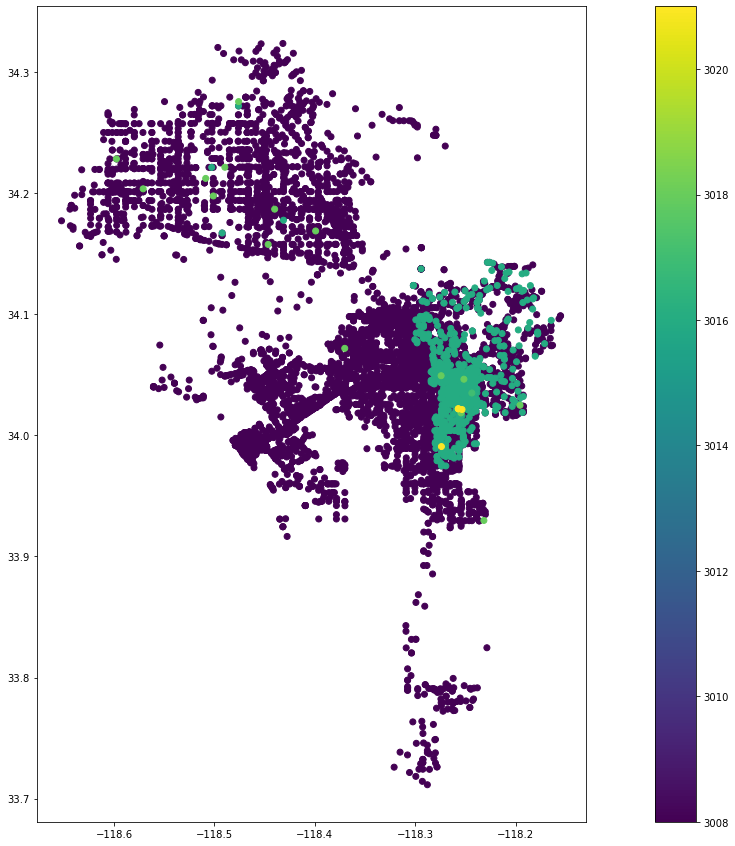

In [15]:
geo.plot(
            figsize= (25,15), 
            column = 'MO Codes',
            legend = True
            )

Interesting! Is there a geospatial element or reasoning for certain MO codes to be confined to specific parts of the city? We'll have to investigate this further in the coming weeks. Our initial assumption was that MO codes were simply categories for different types of traffic collisions, so we would expect there to be no geographic pattern to different MO codes being in certain parts of the city (aka different colors would be spread out and intermixed across the city).

For now, let's load some more libraries to create a basemap and clean up the plot.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
#loading mercator projection from Open Street Maps (OSM)
osm_web_mercator = geo.to_crs(epsg=3857)

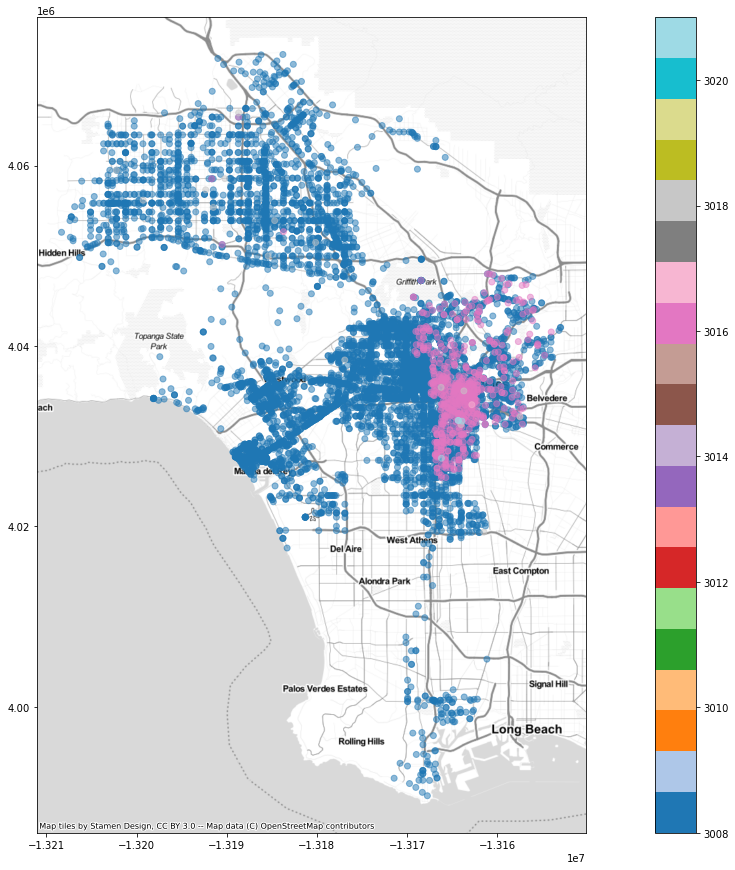

In [26]:
fig,ax = plt.subplots(figsize=(25,15))
osm_web_mercator.plot(ax=ax,
                    column = 'MO Codes',
                    legend = True,
                    cmap = 'tab20',
                    alpha = 0.5,
                   )

# loading a basemap that has relatively clean mapping of LA
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

## Part 2: Loading up isochrone mapping with our group data

Based on the plot we just created, I want to test out the isochrone mapping for a neighborhood with a lot of traffic collisions. There's a lot to choose from, but I'll start with the area around North Hollywood subway station (lat/long approximately 

In [ ]:
# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

In [ ]:
# configure the place, network type, trip times, and travel speed
address = 'Boyle Heights, Los Angeles, CA, USA'
network_type = 'bike'
trip_times = [5, 10, 15, 20] #in minutes
meters_per_minute = 250 # travel distance per minute, using a low estimate of 15 km/h or 15000 m/h divided by 60 minutes = 250 m per min 